In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import kart_ocr
import os
import kart_analysis
from PIL import Image
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
input_path = "./2023-11-15/"
heats = []
for r, _, files in os.walk(input_path):
    for f in files:
        heat_name, ext = os.path.splitext(f)
        if ext == ".json":
            continue
        path = os.path.join(r, f)
        df = kart_ocr.read_to_pandas(path, heat_name)
        heats.append(df)


Applied correction in row 11, column 0, replace 	'36 471' with 	'36.171'
Applied correction in row 0, column 1, replace 	'Jknu' with 	'4: Jknu'
Applied correction in row 13, column 1, replace 	'361992' with 	'36.992'
Applied correction in row 0, column 2, replace 	'Msb' with 	'1: Msb'
Applied correction in row 19, column 2, replace 	'27.366' with 	'37.366'
Applied correction in row 6, column 3, replace 	'37443' with 	'37.443'
Applied correction in row 0, column 4, replace 	'11: Hoestru' with 	'11: Hoestrup'
Applied correction in row 16, column 5, replace 	'37577' with 	'37.577'
Applied correction in row 10, column 0, replace 	'378104' with 	'37.104'
Applied correction in row 0, column 5, replace 	'1: PG' with 	'1: Pg'
Applied correction in row 6, column 2, replace 	'38100' with 	'38.100'
Applied correction in row 14, column 2, replace 	'37121' with 	'37.121'
Applied correction in row 19, column 2, replace 	'28.752' with 	'38.752'
Applied correction in row 17, column 3, replace 	'374479

In [73]:
_ = list(map(lambda h: display(h.describe()), heats))

,Lap,Time
count,112.000000,112
mean,9.839286,0 days 00:00:37.577705357
std,5.415283,0 days 00:00:01.154436016
min,1.000000,0 days 00:00:35.754000
25%,5.000000,0 days 00:00:36.906750
50%,10.000000,0 days 00:00:37.409500
75%,14.250000,0 days 00:00:37.858000
max,19.000000,0 days 00:00:45.116000


,Lap,Time
count,108.000000,108
mean,9.500000,0 days 00:00:38.869833333
std,5.212315,0 days 00:00:02.049551496
min,1.000000,0 days 00:00:37.104000
25%,5.000000,0 days 00:00:37.806000
50%,9.500000,0 days 00:00:38.464000
75%,14.000000,0 days 00:00:39.274000
max,18.000000,0 days 00:00:55.626000


,Lap,Time
count,92.000000,92
mean,9.706522,0 days 00:00:38.144630434
std,5.344275,0 days 00:00:01.263519519
min,1.000000,0 days 00:00:36.934000
25%,5.000000,0 days 00:00:37.386500
50%,10.000000,0 days 00:00:37.799000
75%,14.000000,0 days 00:00:38.560000
max,19.000000,0 days 00:00:44.482000


,Lap,Time
count,112.000000,112
mean,9.839286,0 days 00:00:37.114232142
std,5.415283,0 days 00:00:01.246925429
min,1.000000,0 days 00:00:35.710000
25%,5.000000,0 days 00:00:36.275500
50%,10.000000,0 days 00:00:36.857500
75%,14.250000,0 days 00:00:37.513500
max,19.000000,0 days 00:00:42.926000


,Lap,Time
count,109.000000,109
mean,9.587156,0 days 00:00:38.132926605
std,5.267319,0 days 00:00:01.055847454
min,1.000000,0 days 00:00:36.738000
25%,5.000000,0 days 00:00:37.405000
50%,10.000000,0 days 00:00:37.997000
75%,14.000000,0 days 00:00:38.535000
max,19.000000,0 days 00:00:41.804000


,Lap,Time
count,91.000000,91
mean,9.604396,0 days 00:00:37.620824175
std,5.282843,0 days 00:00:00.807200905
min,1.000000,0 days 00:00:36.156000
25%,5.000000,0 days 00:00:37.129500
50%,10.000000,0 days 00:00:37.575000
75%,14.000000,0 days 00:00:37.842000
max,19.000000,0 days 00:00:40.701000


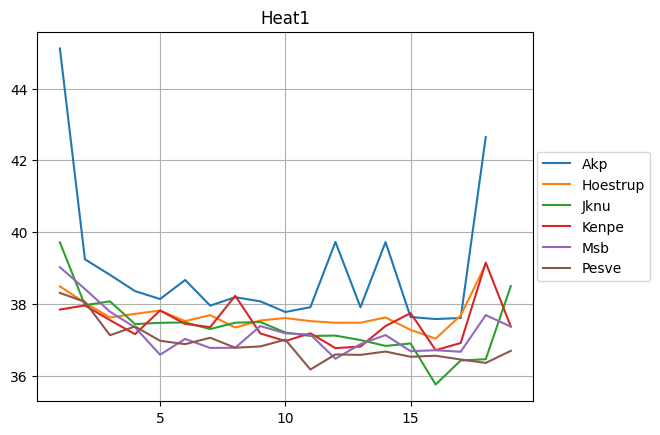

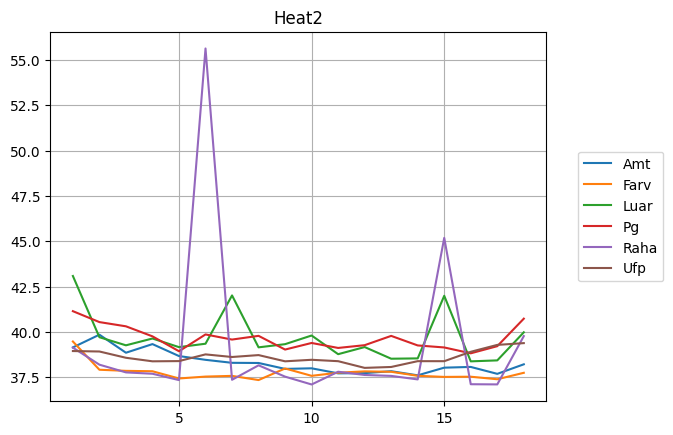

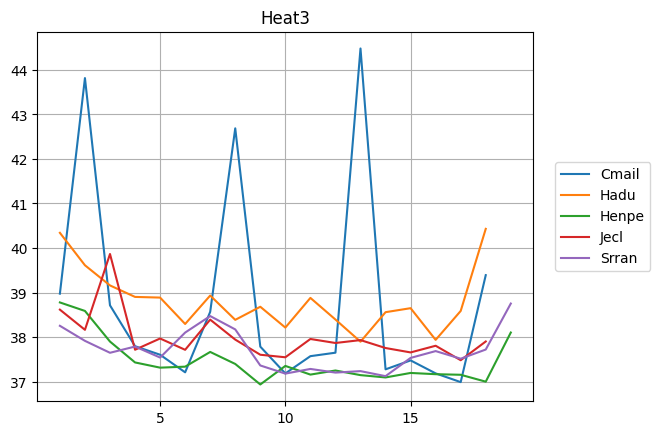

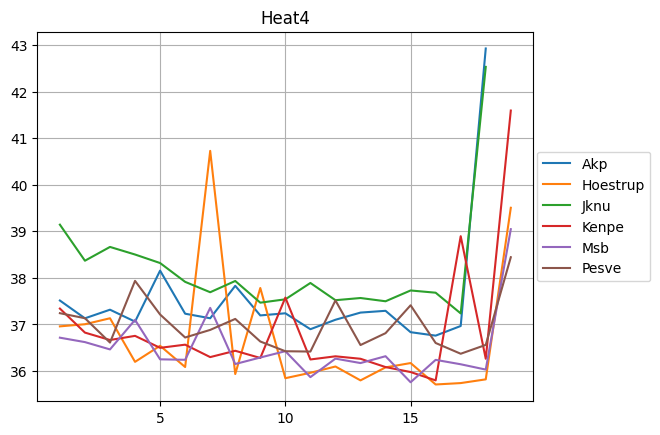

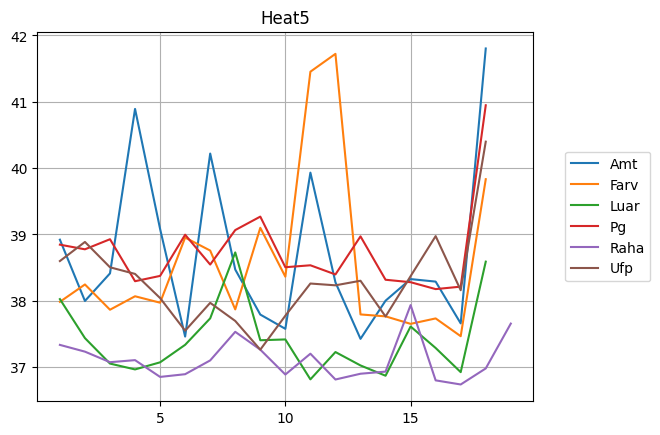

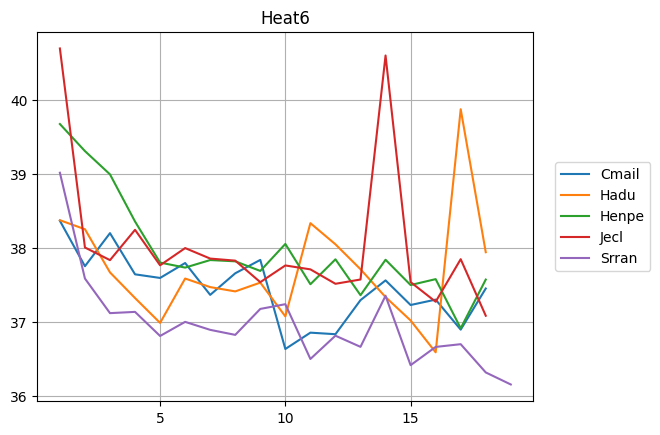

In [74]:
_ = list(map(lambda h: kart_analysis.plot_lap_times(h) , heats))

In [97]:
# Add more versions of the time column
combined = pd.concat(heats, ignore_index=True)
combined["TimeNs"] = combined["Time"].values.astype(np.int64)
combined["TimeS"] = combined["TimeNs"] / 1_000_000_000

# Show fastest lap
display(combined.iloc[combined["Time"].idxmin()])

display(combined)

Heat                       Heat4
Driver                  Hoestrup
Kart                           9
Lap                           16
Time      0 days 00:00:35.710000
TimeNs               35710000000
TimeS                      35.71
Name: 327, dtype: object

,Heat,Driver,Kart,Lap,Time,TimeNs,TimeS
0,Heat1,Pesve,9,1,0 days 00:00:38.305000,38305000000,38.305
1,Heat1,Pesve,9,2,0 days 00:00:38.056000,38056000000,38.056
2,Heat1,Pesve,9,3,0 days 00:00:37.126000,37126000000,37.126
3,Heat1,Pesve,9,4,0 days 00:00:37.370000,37370000000,37.370
4,Heat1,Pesve,9,5,0 days 00:00:36.971000,36971000000,36.971
...,...,...,...,...,...,...,...
619,Heat6,Jecl,2,14,0 days 00:00:40.606000,40606000000,40.606
620,Heat6,Jecl,2,15,0 days 00:00:37.541000,37541000000,37.541
621,Heat6,Jecl,2,16,0 days 00:00:37.275000,37275000000,37.275
622,Heat6,Jecl,2,17,0 days 00:00:37.851000,37851000000,37.851


In [76]:
# Average lap time for each driver
combined.groupby("Driver").mean(numeric_only=True).sort_values(by="TimeNs", inplace=False)

,Lap,TimeNs,TimeS
Driver,,,
Msb,10.000000,3.685403e+10,36.854026
Pesve,10.000000,3.693526e+10,36.935263
Kenpe,10.000000,3.716224e+10,37.162237
Hoestrup,9.756757,3.717889e+10,37.178892
Srran,10.000000,3.733884e+10,37.338842
Henpe,9.756757,3.771276e+10,37.712757
Jknu,9.756757,3.775305e+10,37.753054
Jecl,9.500000,3.801628e+10,38.016278
Raha,9.756757,3.812808e+10,38.128081


In [77]:
# Median laptime for each driver
combined.groupby("Driver").median(numeric_only=True).sort_values(by="TimeNs", inplace=False)

,Lap,TimeNs,TimeS
Driver,,,
Msb,10.0,3.669500e+10,36.6950
Pesve,10.0,3.679500e+10,36.7950
Kenpe,10.0,3.693700e+10,36.9370
Srran,10.0,3.723800e+10,37.2380
Raha,10.0,3.733500e+10,37.3350
Hoestrup,10.0,3.734000e+10,37.3400
Jknu,10.0,3.752000e+10,37.5200
Henpe,10.0,3.757500e+10,37.5750
Cmail,9.5,3.759950e+10,37.5995


In [104]:
feature_encoder, features, dataset = kart_analysis.encode_as_categorical(combined, ["Driver", "Kart"])
# Spot check that the features line up with the data
dataset.iloc[0]

Heat                         Heat1
Driver                       Pesve
Kart                             9
Lap                              1
Time        0 days 00:00:38.305000
TimeNs                 38305000000
TimeS                       38.305
Akp                            0.0
Amt                            0.0
Cmail                          0.0
Farv                           0.0
Hadu                           0.0
Henpe                          0.0
Hoestrup                       0.0
Jecl                           0.0
Jknu                           0.0
Kenpe                          0.0
Luar                           0.0
Msb                            0.0
Pesve                          1.0
Pg                             0.0
Raha                           0.0
Srran                          0.0
Ufp                            0.0
0                              0.0
1                              0.0
11                             0.0
2                              0.0
3                   

In [105]:
# Now fit the model
#model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=.5)
true_values = dataset[['TimeS']]
display(true_values)
model.fit(features, true_values)

,TimeS
0,38.305
1,38.056
2,37.126
3,37.370
4,36.971
...,...
619,40.606
620,37.541
621,37.275
622,37.851


Ridge(alpha=0.5)

In [106]:
predictions = model.predict(features)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(true_values, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(true_values, predictions))

Mean squared error: 1.53
Coefficient of determination: 0.26


Better than last, but still not very reliable to look at all laps...

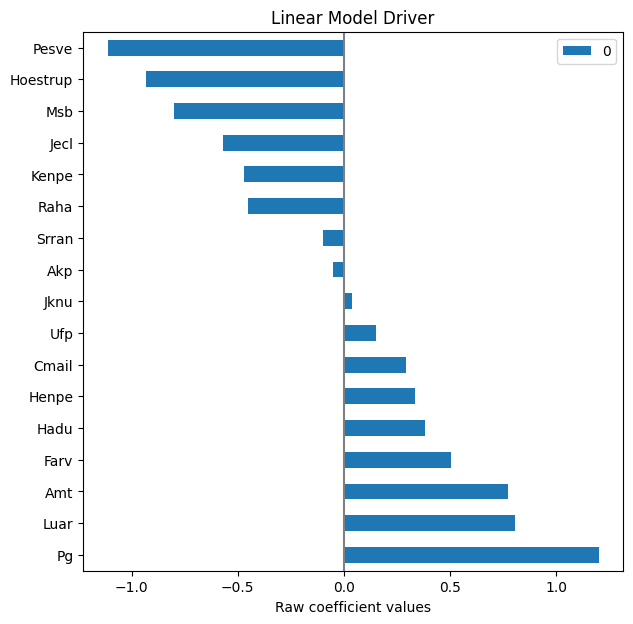

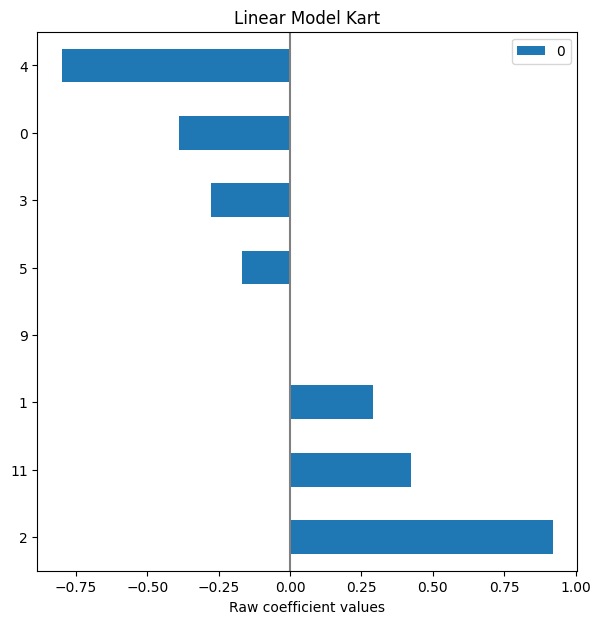

In [107]:
# Lets plot the coefficients
coeffs = kart_analysis.get_model_coefficients(model, features)
kart_analysis.plot_coefficients(coeffs, feature_encoder, ["Driver", "Kart"])

In [108]:
# The bias, can be considered the neutral lap time in seconds
model.intercept_

array([37.91924516])

Now the model is mot very accurate. I wonder what would happen if I just used the best lap for each driver in each heat

In [116]:
best_idx = combined.groupby(["Heat", "Driver"])["TimeNs"].idxmin()
best_only = combined.loc[best_idx]
best_only

,Heat,Driver,Kart,Lap,Time,TimeNs,TimeS
109,Heat1,Akp,2,16,0 days 00:00:37.577000,37577000000,37.577
91,Heat1,Hoestrup,11,16,0 days 00:00:37.032000,37032000000,37.032
34,Heat1,Jknu,4,16,0 days 00:00:35.754000,35754000000,35.754
72,Heat1,Kenpe,5,16,0 days 00:00:36.710000,36710000000,36.710
49,Heat1,Msb,1,12,0 days 00:00:36.470000,36470000000,36.470
10,Heat1,Pesve,9,11,0 days 00:00:36.171000,36171000000,36.171
161,Heat2,Amt,9,14,0 days 00:00:37.608000,37608000000,37.608
137,Heat2,Farv,4,8,0 days 00:00:37.348000,37348000000,37.348
199,Heat2,Luar,11,16,0 days 00:00:38.379000,38379000000,38.379
217,Heat2,Pg,1,16,0 days 00:00:38.822000,38822000000,38.822


In [119]:
best_only_features = feature_encoder.transform(best_only[["Driver", "Kart"]]).toarray()
best_only_features
best_only_model = linear_model.Ridge()
best_only_model.fit(best_only_features, best_only[["TimeS"]])


Ridge()

In [121]:
best_only_predictions = best_only_model.predict(best_only_features)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(best_only[["TimeS"]], best_only_predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(best_only[["TimeS"]], best_only_predictions))

Mean squared error: 0.11
Coefficient of determination: 0.80


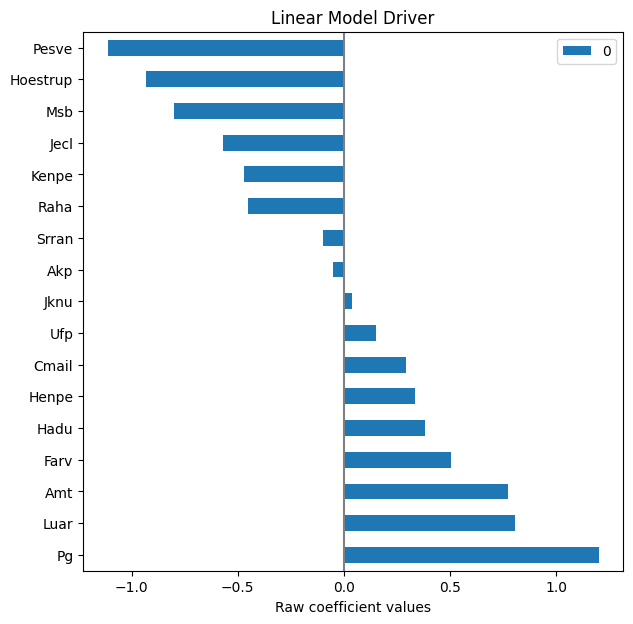

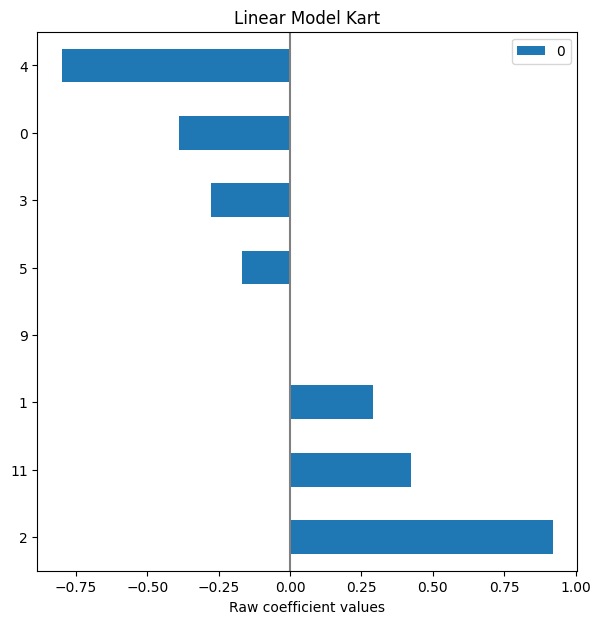

In [122]:
# Lets plot the coefficients
coeffs = kart_analysis.get_model_coefficients(model, features)
kart_analysis.plot_coefficients(coeffs, feature_encoder, ["Driver", "Kart"])

In [123]:
# The bias, can be considered the neutral lap time in seconds
best_only_model.intercept_

array([36.98498235])